# Statistical Analysis of Groups (t-student testing)

In [74]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data_path = "../../resources/nl-experiment1/transformed-data/nl-experiment-01.csv"
nl_data = pd.read_csv(data_path)

In [7]:
nl_data.head(10)

,CTYPE,USER,CASEN,ANSWER_DESC,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,ANSWER_EKG,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG
0,DF,61,Case-01,acs,1.0,60,116.29,nstemi,1.0,85,44.17
1,DF,61,Case-02,gastrointestinal,1.0,85,102.18,gastrointestinal,1.0,65,101.37
2,DF,61,Case-03,tendomyogenic,1.0,85,81.42,tendomyogenic,1.0,85,31.00
3,DF,61,Case-07,pericarditis,1.0,50,67.92,pericarditis,1.0,91,34.73
4,DF,61,Case-08,acs,1.0,70,49.27,acs,1.0,90,33.66
5,DF,61,Case-09,acs,1.0,75,67.40,acs,1.0,84,36.09
6,DF,61,Case-12,afib,0.5,50,148.74,transient tachycardia,0.5,60,58.12
7,DF,61,Case-13,acs,1.0,81,36.46,acs,1.0,90,37.14
8,DF,61,Case-15,acs,1.0,89,43.97,acs,1.0,90,15.15
9,DF,61,Case-16,acs,1.0,80,51.14,acs 3vd,1.0,89,23.69


In [5]:
nl_data.describe()

,USER,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,87.455008,0.759762,64.312394,61.508438,0.663837,60.237691,51.955331
std,15.927347,0.390701,19.538577,37.271248,0.410201,22.418436,31.064419
min,61.000000,0.000000,3.000000,8.880000,0.000000,0.000000,6.870000
25%,73.000000,0.500000,52.000000,36.460000,0.500000,45.000000,29.420000
50%,88.000000,1.000000,66.000000,52.300000,1.000000,61.000000,45.770000
75%,101.000000,1.000000,79.000000,76.630000,1.000000,77.000000,66.260000
max,116.000000,1.000000,100.000000,420.380000,1.000000,100.000000,226.960000


## Splitting Data in Description and EKG groups

In [59]:
df_group = nl_data[nl_data.CTYPE == "DF"]
df_group.describe()

,USER,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,73.000000,0.751773,63.354610,60.662270,0.778369,66.609929,40.017872
std,7.423633,0.405145,19.164445,31.372969,0.364814,21.742025,21.469140
min,61.000000,0.000000,3.000000,8.880000,0.000000,0.000000,8.570000
25%,66.000000,0.500000,51.000000,39.052500,0.500000,54.250000,24.082500
50%,73.000000,1.000000,64.500000,53.645000,1.000000,69.000000,34.860000
75%,80.000000,1.000000,75.750000,76.532500,1.000000,81.750000,51.917500
max,85.000000,1.000000,100.000000,181.100000,1.000000,100.000000,108.690000


In [11]:
ef_group = nl_data[nl_data.CTYPE == "EF"]
ef_group.describe()

,USER,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,100.732899,0.767101,65.192182,62.285700,0.558632,54.384365,62.920684
std,8.210884,0.377460,19.866520,42.002663,0.421810,21.444460,34.337809
min,86.000000,0.000000,3.000000,14.760000,0.000000,1.000000,6.870000
25%,94.000000,0.500000,53.500000,34.660000,0.000000,37.500000,38.070000
50%,101.000000,1.000000,68.000000,50.420000,0.500000,57.000000,55.950000
75%,107.000000,1.000000,80.000000,76.320000,1.000000,70.000000,78.280000
max,116.000000,1.000000,100.000000,420.380000,1.000000,100.000000,226.960000


# Hypothesis testing for total time in a case

In [60]:
df_group.loc[:, "TIME_CASE"] = df_group["TIME_DESC"] + df_group["TIME_EKG"]
df_group.describe()

,USER,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG,TIME_CASE
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,73.000000,0.751773,63.354610,60.662270,0.778369,66.609929,40.017872,100.680142
std,7.423633,0.405145,19.164445,31.372969,0.364814,21.742025,21.469140,42.483554
min,61.000000,0.000000,3.000000,8.880000,0.000000,0.000000,8.570000,20.520000
25%,66.000000,0.500000,51.000000,39.052500,0.500000,54.250000,24.082500,69.450000
50%,73.000000,1.000000,64.500000,53.645000,1.000000,69.000000,34.860000,93.945000
75%,80.000000,1.000000,75.750000,76.532500,1.000000,81.750000,51.917500,125.105000
max,85.000000,1.000000,100.000000,181.100000,1.000000,100.000000,108.690000,245.850000


In [61]:
ef_group.loc[:, "TIME_CASE"] = ef_group["TIME_DESC"] + ef_group["TIME_EKG"]
ef_group.describe()

,USER,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG,TIME_CASE
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,100.732899,0.767101,65.192182,62.285700,0.558632,54.384365,62.920684,125.206384
std,8.210884,0.377460,19.866520,42.002663,0.421810,21.444460,34.337809,56.572212
min,86.000000,0.000000,3.000000,14.760000,0.000000,1.000000,6.870000,36.890000
25%,94.000000,0.500000,53.500000,34.660000,0.000000,37.500000,38.070000,84.620000
50%,101.000000,1.000000,68.000000,50.420000,0.500000,57.000000,55.950000,114.780000
75%,107.000000,1.000000,80.000000,76.320000,1.000000,70.000000,78.280000,155.595000
max,116.000000,1.000000,100.000000,420.380000,1.000000,100.000000,226.960000,474.240000


### Here we can check that the time in a case are statiscally different between the two groups  ($t = -5.91, p = 5.84^{-9}$)

In [62]:
ttest_total_time = ttest_ind(df_group["TIME_CASE"], ef_group["TIME_CASE"])
ttest_total_time

Ttest_indResult(statistic=-5.9088788134998325, pvalue=5.8402800077186535e-09)

## Final confidence Hypothesis Test

In [64]:
ttest_final_conf = ttest_ind(df_group["CONFIDENCE_EKG"], ef_group["CONFIDENCE_DESC"])
ttest_final_conf

Ttest_indResult(statistic=0.8269420674747929, pvalue=0.4086059170241658)

### This test allows us to check weather the order of presentation change the confidence on the final answer of the student. Therefore a t-test applied to the confidence on EKG round for the Description First Group and confidence on Description round for EKG First Group. The test result is p < 0.5, a value that can be used to reject H0 but indicates only a small correlation.

## Linear Regression (in this case equivalent to least-squares) to see how initial confidence affects time in second round

In [95]:
init_conf_and_final_time = pd.DataFrame(columns=["CONF", "TIME"])
init_conf_and_final_time["CONF"] = df_group["CONFIDENCE_DESC"].append(ef_group["CONFIDENCE_EKG"])

In [96]:
init_conf_and_final_time["TIME"] = df_group["TIME_EKG"].append(ef_group["TIME_DESC"])

In [98]:
init_conf_and_final_time

,CONF,TIME
0,60,44.17
1,85,101.37
2,85,31.00
3,50,34.73
4,70,33.66
...,...,...
584,70,32.83
585,60,58.47
586,65,36.39
587,69,44.04


In [127]:
array_conf_time = init_conf_and_final_time.to_numpy()
x = array_conf_time[:,0]
X = x.reshape((-1,1))
y = array_conf_time[:,1]

In [128]:
model = LinearRegression().fit(X,y)

In [129]:
c = model.intercept_
m = model.coef_
print((m, c))

(array([-0.04237994]), 54.111180954543705)


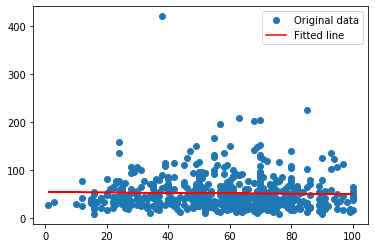

In [130]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=6)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()